## **Exploratory Data Analysis for Tourism Sector in Tanzania.**

### **1. Understand the Problem Statement**


Tourism is a vital pillar of Tanzania’s economy, contributing significantly to foreign exchange earnings, employment, and community development. Renowned globally for attractions such as Serengeti National Park, Mount Kilimanjaro, and Zanzibar beaches, the country draws millions of visitors annually.

However, there is limited data-driven understanding of visitor demographics, seasonal patterns, and revenue drivers. This lack of insight hinders informed decision-making for policymakers, tourism boards, and stakeholders, resulting in inefficiencies in marketing strategies, resource allocation, and sustainable sector planning.

To address this, there is a need to analyze historical tourism data to uncover patterns in tourist arrivals, spending, preferences, and peak seasons. Furthermore, a predictive model can be developed to classify and forecast tourist flow levels (e.g., "High", "Medium", or "Low") and segment visitors based on key attributes like source market or package preferences.

By combining Exploratory Data Analysis (EDA) with predictive modeling, this project aims to provide actionable insights and build a foundation for data-driven decision-making in Tanzania’s tourism sector.

##### Import libraries.

In [114]:
# import important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


##### Load Dataset

In [115]:
data = pd.read_csv('./datasets/Train.csv')

In [116]:
#explore data
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


### **2. Hypothesis Generation**

Hypothesis generation is a critical stage in any data science or machine learning pipeline. It involves thoroughly understanding the problem and brainstorming all possible factors that may influence the outcome. This step is carried out before analyzing the data to form logical assumptions that can later be tested.

Based on the tourism data and context, the following hypotheses are proposed:

* **Age Group**: Young adults are more likely to visit Tanzania compared to other age groups.
* **Travel Companions**: Visitors are more likely to travel alone or with their spouse rather than with children.
* **Purpose of Visit**: Most visitors travel to Tanzania primarily for leisure and holidays rather than business or visiting friends and relatives.
* **Tourism Activities**: Visitors prefer wildlife and beach tourism over cultural or business-related tourism.
* **Information Source**: Tourists are more likely to learn about Tanzania through travel agents, friends, or relatives than through TV, radio, web platforms, magazines, or Tanzanian missions abroad.
* **Tour Arrangement**: Visitors prefer arranging tours independently rather than opting for package tours.
* **Payment Method**: Cash is the most common mode of payment among visitors, compared to credit cards or travelers' cheques.
* **Trip Frequency**: A majority of visitors are on their first trip to Tanzania rather than being repeat travelers.
* **Visitor Impressions**: Visitors are more likely to appreciate the friendliness of Tanzanians compared to giving feedback on experiences or overall satisfaction.
* **Pricing Preference**: Most visitors prefer reasonably priced services rather than low-cost or high-cost options.
* **Length of Stay**: The typical length of stay for visitors is up to two weeks.
* **Destination Preference**: Visitors spend more time in Zanzibar than on mainland Tanzania.
* **Package Services**: Most visitors prefer not to use package services.



### **3. Describe Data Structure**

**Note:** Open the VariableDefinition file to understand the meaning of each variable in this dataset

In [117]:
variable_dfn = pd.read_csv('./datasets/VariableDefinitions.csv')
display(variable_dfn)

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [118]:
#data shape
print(f"Data Shape: {data.shape}")

Data Shape: (4809, 23)


In [119]:
#list first data
data.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.0,7.0,Cash,Yes,Friendly People,13260000.0


In [120]:
data.describe

<bound method NDFrame.describe of              ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44                NaN   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24                NaN   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24                NaN   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0          

### **4. Explolatory Data Analysis**


This is the process of finding some insights from you dataset before create predictive models.
**Note:** This is an important steps in your Data science workflow.

In [121]:
# Check for missing values
print('missing values:', data.isnull().sum())

missing values: ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64


##### **Note**: Since we have missing values , then we have to replace them with real data.

In [122]:
# Check missing values count per column
missing_counts = data[['travel_with', 'total_female', 'total_male', 'most_impressing']].isnull().sum()

for col in ['travel_with', 'total_female', 'total_male', 'most_impressing']:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'O':  # object/string type
            data[col] = data[col].fillna('Alone')
        else:  # numeric
            data[col] = data[col].fillna(data[col].median())


# Confirm no more nulls in those columns
print(data.isnull().sum())


ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64


##### since we have no missing values we can proceed to data mapping


In [123]:
age_mapping = {
    "1-24" : "Child or Youth",
    "25-44" : "Young Adult",
    "45-64" : "Senior Adult",
    "65+" : "Elder",
}

data['age_group'] = data.age_group.map(age_mapping)
# data.head()
data.age_group.value_counts()

age_group
Young Adult       2487
Senior Adult      1391
Child or Youth     624
Elder              307
Name: count, dtype: int64

#### we need to organize well the data 
For packages we are combining all in one column and , night_spent in tanzania mainland and zanzibar , because it is one country 

In [124]:
# Fix column name typos
data.rename(columns={
    'infor_source': 'info_source',
    'tour_arrangment': 'tour_arrangement',
    'package_accomodation': 'package_accommodation'
}, inplace=True)

# Combine nights stayed on mainland and Zanzibar into one total nights column
# data['nights_stayed'] = data['night_mainland'] + data['night_zanzibar']

# Package columns and mapping
package_mapping = {
    'package_transport_int': 'Transport Package',
    'package_accommodation': 'Accommodation Package',
    'package_food': 'Food Package',
    'package_transport_tz': 'Transportation Package',
    'package_sightseeing': 'Sightseeing Package',
    'package_guided_tour': 'Guided Tour Package',
    'package_insurance': 'Insurance Package'
}

package_cols = list(package_mapping.keys())

# Create combined multi-label column 'package_services'
def get_included_services(row):
    services = [package_mapping[col] for col in package_cols if str(row[col]).strip().lower() == 'yes']
    return ', '.join(services) if services else 'None'

data['package_services'] = data.apply(get_included_services, axis=1)

# ✅ Drop package columns AND nights columns in one go
data.drop(columns=package_cols  ,inplace=True)
# Convert to integers to remove decimals
data['total_male'] = data['total_male'].astype(int)
data['total_female'] = data['total_female'].astype(int)
# Convert to integers to remove decimals
data['night_mainland'] = data['night_mainland'].astype(int)
data['night_zanzibar'] = data['night_zanzibar'].astype(int)
# Convert to integers to remove decimals
data['total_cost'] = data['total_cost'].astype(int)


# Check the result
data.head(30)


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,package_services
0,tour_0,SWIZERLAND,Senior Adult,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,13,0,Cash,No,Friendly People,674602,None
1,tour_10,UNITED KINGDOM,Young Adult,Alone,1,0,Leisure and Holidays,Cultural tourism,others,Independent,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906,None
2,tour_1000,UNITED KINGDOM,Young Adult,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,1,31,Cash,No,Excellent Experience,3315000,None
3,tour_1002,UNITED KINGDOM,Young Adult,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,11,0,Cash,Yes,Friendly People,7790250,"Accommodation Package, Food Package, Transport..."
4,tour_1004,CHINA,Child or Youth,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,7,4,Cash,Yes,No comments,1657500,None
5,tour_1005,UNITED KINGDOM,Young Adult,Alone,0,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,9,3,Cash,Yes,Wildlife,120950,"Sightseeing Package, Guided Tour Package"
6,tour_1007,SOUTH AFRICA,Senior Adult,Alone,0,1,Business,Mountain climbing,"Friends, relatives",Independent,9,0,Cash,Yes,Friendly People,466140,None
7,tour_1008,UNITED STATES OF AMERICA,Senior Adult,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,10,3,Cash,Yes,Friendly People,3480750,"Transport Package, Accommodation Package, Food..."
8,tour_101,NIGERIA,Young Adult,Alone,0,1,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,4,0,Cash,Yes,Alone,994500,None
9,tour_1011,INDIA,Young Adult,Alone,1,0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,5,0,Credit Card,Yes,Friendly People,2486250,None


In [125]:
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,package_services
0,tour_0,SWIZERLAND,Senior Adult,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,13,0,Cash,No,Friendly People,674602,None
1,tour_10,UNITED KINGDOM,Young Adult,Alone,1,0,Leisure and Holidays,Cultural tourism,others,Independent,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906,None
2,tour_1000,UNITED KINGDOM,Young Adult,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,1,31,Cash,No,Excellent Experience,3315000,None
3,tour_1002,UNITED KINGDOM,Young Adult,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,11,0,Cash,Yes,Friendly People,7790250,"Accommodation Package, Food Package, Transport..."
4,tour_1004,CHINA,Child or Youth,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,7,4,Cash,Yes,No comments,1657500,None


#### **Types of EDA**

##### A. Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [126]:

data.country.value_counts()

country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
CYPRUS                        1
URUGUAY                       1
MORROCO                       1
BERMUDA                       1
ESTONIA                       1
Name: count, Length: 105, dtype: int64

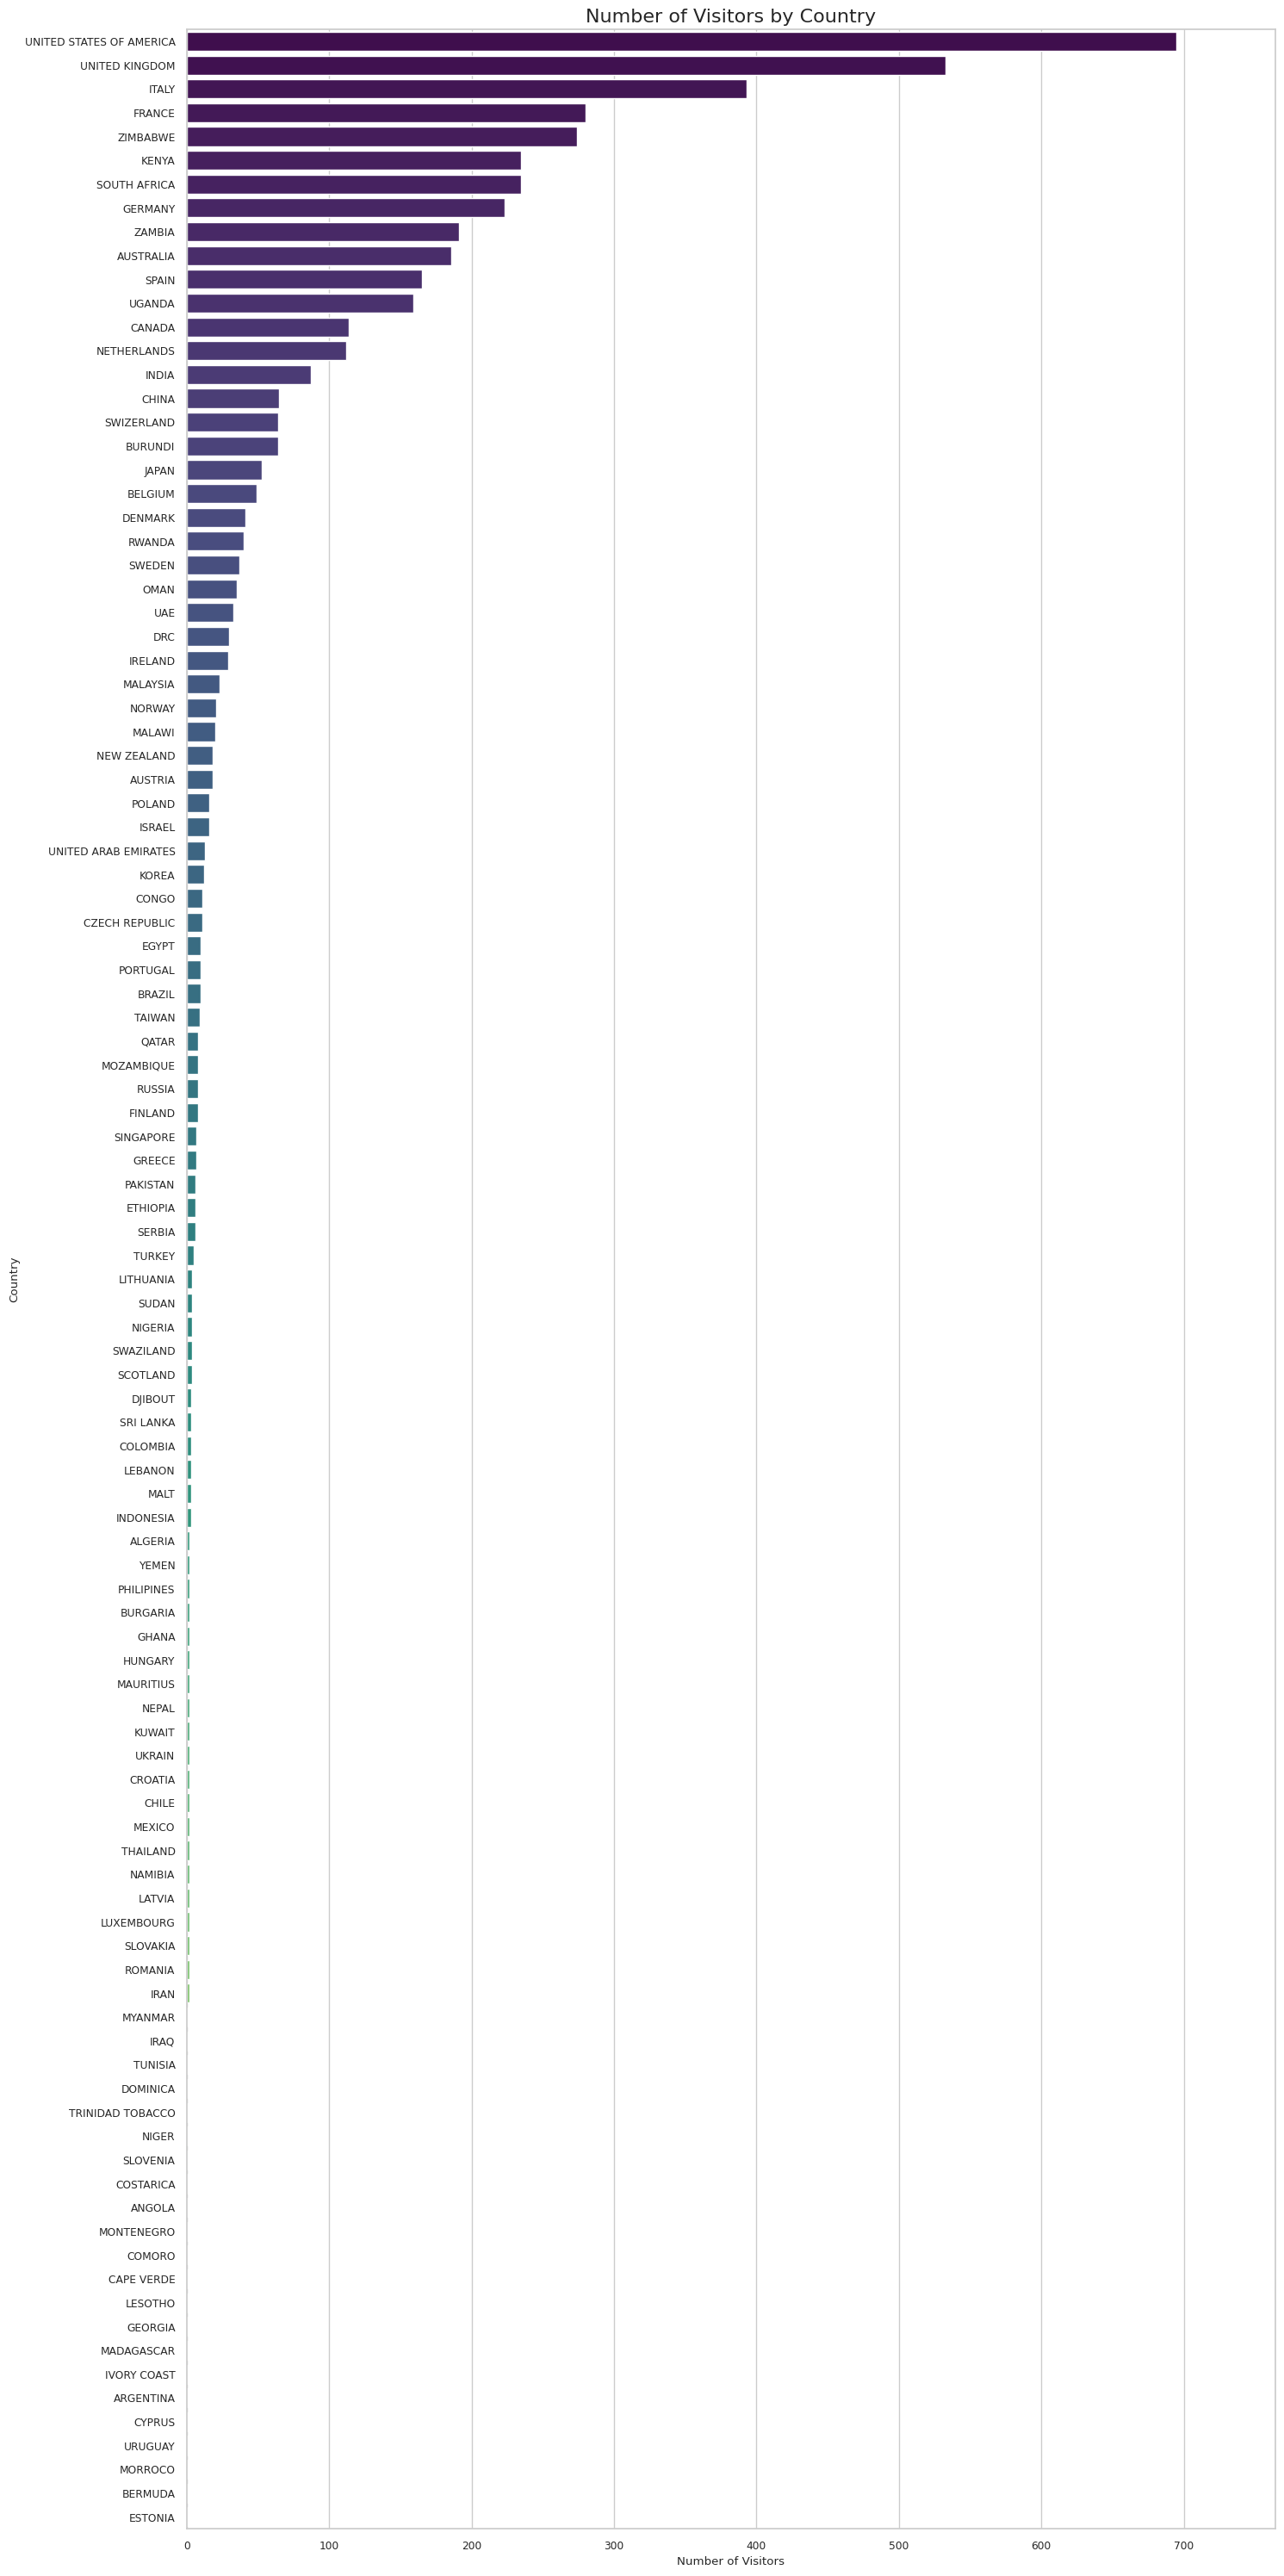

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

country_counts = data['country'].value_counts()

sns.set(style="whitegrid", font_scale=0.8)
plt.figure(figsize=(15, 30))

ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")

# Set a smaller scale for x-axis (e.g., max + 10%)
plt.xlim(0, country_counts.max() + (country_counts.max() * 0.1))

plt.title("Number of Visitors by Country", fontsize=16)
plt.xlabel("Number of Visitors")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


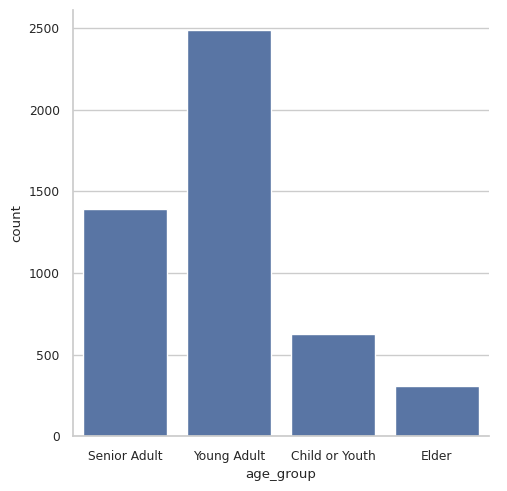

In [128]:
# data.total_male.value_counts()
sns.catplot(x='age_group' , kind='count' , data=data)

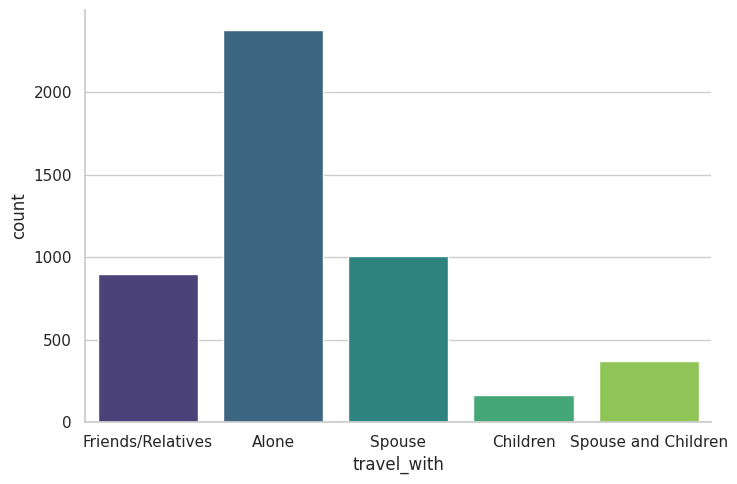

In [129]:

sns.set(style="whitegrid")

# Control size: height (per facet) and aspect ratio
sns.catplot(
    x='travel_with',
    kind='count',
    data=data,
    height=5,       # height in inches
    aspect=1.5,     # width = height * aspect
    palette='viridis'
)

In [130]:
# data.info_source.value_counts()

In [131]:
# data.tour_arrangement.value_counts()

In [132]:
# data.payment_mode.value_counts()

In [133]:
# data.first_trip_tz.value_counts()

In [134]:
#data.most_impressing.value_counts()

In [135]:
# data.total_cost.value_counts()

In [136]:
# data.night_mainland.value_counts()

In [137]:
# data.night_zanzibar.value_counts()

In [138]:
# data.package_services.value_counts()